In [36]:
import cifar10
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier 

In [37]:
cifar10.data_path = "data/CIFAR-10/"

In [38]:
cifar10.maybe_download_and_extract()

Data has apparently already been downloaded and unpacked.


In [39]:
class_names = cifar10.load_class_names()
class_names

Loading data: data/CIFAR-10/cifar-10-batches-py/batches.meta


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [40]:
images_train, cls_train, labels_train = cifar10.load_training_data()
images_test, cls_test, labels_test = cifar10.load_test_data()

Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_1
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_2
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_3
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_4
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_5
Loading data: data/CIFAR-10/cifar-10-batches-py/test_batch


In [41]:
images_train.shape, cls_train.shape, labels_train.shape

((50000, 32, 32, 3), (50000,), (50000, 10))

In [42]:
images_test.shape, cls_test.shape, labels_test.shape

((10000, 32, 32, 3), (10000,), (10000, 10))

In [43]:
labels_train[:10]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]])

In [44]:
cls_train

array([6, 9, 9, ..., 9, 1, 1])

In [45]:
images_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [46]:
x_train_images=images_train[:,:,:,:]
x_train=x_train_images.reshape(50000, 32*32*3)
y_train=cls_train
x_test_images=images_test[:,:,:,:]
x_test=x_test_images.reshape(10000, 32*32*3)
y_test=cls_test

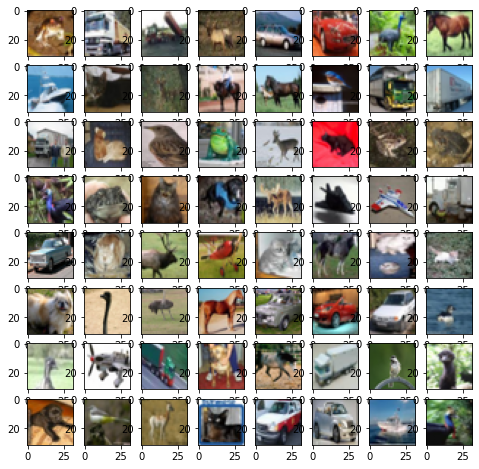

In [47]:
fig=plt.figure(figsize=(8,8))
for i in range(64):
    ax=fig.add_subplot(8,8, i+1)
    ax.imshow(x_train_images[i], cmap=plt.cm.bone)
plt.show()

In [48]:
pca=PCA(whiten=True)
pca.fit(x_train)

PCA(whiten=True)

In [49]:
pca.components_.shape

(3072, 3072)

In [50]:
k=0
total=sum(pca.explained_variance_)
current_sum=0
while current_sum/total <0.99:
    current_sum+=pca.explained_variance_[k]
    k+=1
k

658

In [51]:
pca=PCA(n_components=k)
x_train_pca=pca.fit_transform(x_train)
x_train_pca.shape

(50000, 658)

In [52]:
x_test_pca=pca.transform(x_test)
x_test_pca.shape

(10000, 658)

In [53]:
x_train_approx=pca.inverse_transform(x_train_pca)
x_train_approx.shape

(50000, 3072)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

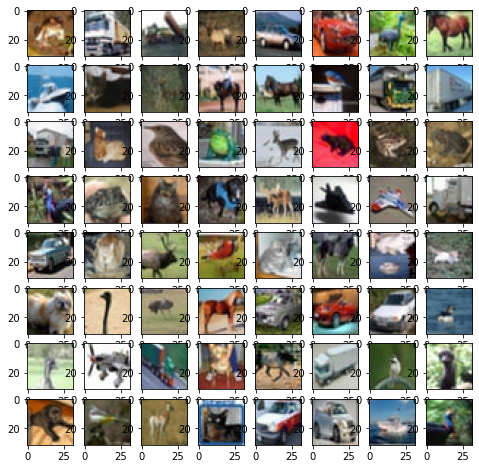

In [54]:
x_approx_image=x_train_approx.reshape(50000, 32,32,3)
fig=plt.figure(figsize=(8,8))
for i in range(64):
    ax=fig.add_subplot(8,8, i+1)
    ax.imshow(x_approx_image[i], cmap=plt.cm.bone)
plt.show()

In [55]:
eigen_vec=pca.components_
eigen_vec.shape

(658, 3072)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

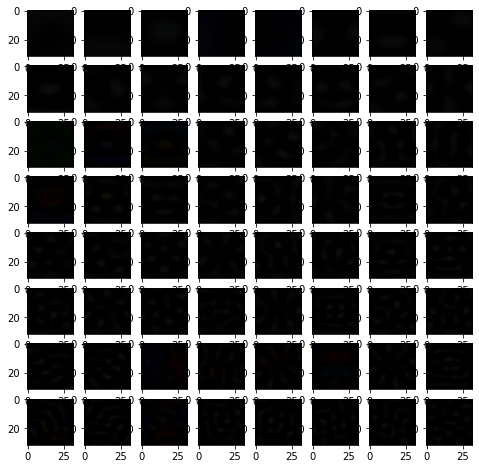

In [57]:
eigen_images=eigen_vec.reshape(658, 32, 32, 3)
fig=plt.figure(figsize=(8,8))
for i in range(64):
    ax=fig.add_subplot(8,8, i+1)
    ax.imshow(eigen_images[i], cmap=plt.cm.bone)
plt.show()

In [66]:
rf=RandomForestClassifier(n_estimators=200, criterion='entropy', class_weight='balanced',random_state=1)
rf.fit(x_train_pca, y_train)
y_pred=rf.predict(x_test_pca)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.48      0.53      0.50      1000
           1       0.46      0.52      0.49      1000
           2       0.31      0.24      0.27      1000
           3       0.26      0.22      0.24      1000
           4       0.40      0.40      0.40      1000
           5       0.34      0.33      0.33      1000
           6       0.47      0.51      0.49      1000
           7       0.45      0.34      0.39      1000
           8       0.49      0.60      0.54      1000
           9       0.42      0.45      0.44      1000

    accuracy                           0.41     10000
   macro avg       0.41      0.41      0.41     10000
weighted avg       0.41      0.41      0.41     10000

[[526  55  43  22  25  25  26  26 192  60]
 [ 35 524  20  42  11  37  27  41  76 187]
 [119  37 242  89 183  88 105  53  53  31]
 [ 60  55  97 224  67 212 106  63  47  69]
 [ 61  20 134  59 395  63 128  74  43  23]
 [ 54  47  83 179  79 333 

In [72]:
from sklearn.svm import LinearSVC
clf=LinearSVC(C=0.01, dual=False, class_weight='balanced', random_state=0)
clf.fit(x_train_pca, y_train)
y_pred=clf.predict(x_test_pca)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.44      0.50      0.47      1000
           1       0.42      0.49      0.45      1000
           2       0.34      0.22      0.27      1000
           3       0.30      0.18      0.23      1000
           4       0.38      0.27      0.31      1000
           5       0.35      0.32      0.33      1000
           6       0.39      0.53      0.45      1000
           7       0.44      0.47      0.45      1000
           8       0.47      0.57      0.51      1000
           9       0.41      0.47      0.44      1000

    accuracy                           0.40     10000
   macro avg       0.39      0.40      0.39     10000
weighted avg       0.39      0.40      0.39     10000

[[503  53  29  18  24  23  29  53 190  78]
 [ 62 492  16  23  18  30  41  58  82 178]
 [113  56 222  63 109  76 171  97  61  32]
 [ 58  83  67 183  49 197 178  51  58  76]
 [ 68  36 108  47 265  85 189 134  30  38]
 [ 51  69  75 121  69 323 

In [73]:
from sklearn.svm import SVC
clf=SVC(kernel='rbf', random_state=1)
clf.fit(x_train_pca, y_train)
y_pred=clf.predict(x_test_pca)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.62      0.62      1000
           1       0.64      0.65      0.64      1000
           2       0.42      0.41      0.42      1000
           3       0.38      0.38      0.38      1000
           4       0.47      0.43      0.45      1000
           5       0.50      0.43      0.46      1000
           6       0.54      0.65      0.59      1000
           7       0.63      0.57      0.60      1000
           8       0.65      0.69      0.67      1000
           9       0.59      0.62      0.60      1000

    accuracy                           0.54     10000
   macro avg       0.54      0.54      0.54     10000
weighted avg       0.54      0.54      0.54     10000

[[621  25  59  17  21  13  20  27 142  55]
 [ 34 646  21  41   6  17  16  21  49 149]
 [ 85  23 409  89 134  63 108  50  24  15]
 [ 31  31  93 383  55 165 123  40  27  52]
 [ 49  14 159  66 435  40 129  70  22  16]
 [ 22  13  85 197  72 433 

In [67]:
ans=[]
for i in y_pred:
    ans.append(class_names[i])
len(ans)

10000

In [68]:
np.savetxt(fname="cifar10_pred.csv", X=ans, delimiter=',', fmt="%s")